# Project: No-show appointments



<img src="patient.jpg" alt="doctor and patient"
	title="Examiation" style="width:1400px; height:300px;" />

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> This **dataset** collects information from about **100-thousand medical appointments** in Brazil. It includes 14 associated variables. Variable names are self-explanatory. The analysis is going around the factors why patients may not show up for their appointments and how to make a prediction about that. Data visualization methods ,such as; histograms and pie charts, are used for convenient analysis and communication. Also,clear and tidy tables are provided in the analysis and conclusion sections. 

>> - **Note**:
>>   - *ScheduledDay*: The day the patient set up their appointment.
>>   - *AppointmentDay*: The day of the actuall appointment, when they have to visit the doctor.
>>   - *Scholarship* (a broad topic) : a subsidy given for very low-income families and one of its requirements is to have their children going to school. For more information check the link: <A href="https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia"
       title="Go to Wikipedia.">Bolsa Família</A>. 

In [50]:
#importing libraries for data analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [51]:
#loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# data inspection
df.head() 


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


- **At first glance:**
 - The data type of PatientId and AppointmentID is numeric.
 - The ScheduledDay and AppointmentDay are ambiguous.
 - No-show column has string data type

In [52]:
#the data shape
df.shape

(110527, 14)

In [53]:
#describe summary
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- There is a negative value for the Age 
- Handcap column has a value of 4 

In [54]:
#looking for unreasonable data (Age)
df[df.Age<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [55]:
#looking for unreasonable data (Handcap)
df[df.Handcap>1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
946,7.282582e+13,5582483,M,2016-04-14T09:26:08Z,2016-04-29T00:00:00Z,94,BELA VISTA,0,1,1,0,2,1,No
1665,1.242919e+13,5525497,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,1,No
1666,1.242919e+13,5525498,M,2016-03-30T09:16:41Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2071,1.242919e+13,5640120,M,2016-04-29T10:08:48Z,2016-04-29T00:00:00Z,64,SANTA MARTHA,0,1,0,1,2,0,No
2091,1.491829e+13,5638626,F,2016-04-29T08:13:59Z,2016-04-29T00:00:00Z,11,ANDORINHAS,0,0,0,0,2,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108376,2.387212e+14,5756931,F,2016-06-01T08:48:28Z,2016-06-07T00:00:00Z,44,ROMÃO,0,1,1,0,2,1,No
109484,3.589495e+14,5752442,M,2016-05-31T11:45:57Z,2016-06-02T00:00:00Z,64,DA PENHA,0,1,1,0,2,0,No
109733,5.662976e+14,5772744,F,2016-06-03T16:11:00Z,2016-06-07T00:00:00Z,34,JUCUTUQUARA,0,0,0,0,2,1,No
109975,4.522185e+13,5766970,M,2016-06-02T16:07:36Z,2016-06-06T00:00:00Z,39,PRAIA DO SUÁ,1,0,0,0,2,1,No


In [56]:
#number of rows for ambiguous Handcap values
df[df.Handcap>1].shape[0]

199

We would drop those 199 rows

### Make sure that other categorial data is clean.

In [57]:
df["No-show"].unique()

array(['No', 'Yes'], dtype=object)

In [58]:

df["Gender"].unique()

array(['F', 'M'], dtype=object)

In [59]:
#looking foe null-value cells
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- There is no null value in the dataset
- The data type of ScheduledDay AppointmentDay is string

#### Search for duplicate rows

In [60]:
sum(df.duplicated())

0


#### Results for EDA:

    1- 32.1% of the patients recieved a reminder message
  
    2- Most patients are between 18 and 55 years old
    
 
    
    
    


|  <h3>Notes for cleaning</h3>    |  <h3> Process  </h3> |
|:------|:------|
| The data type of the two columns PatientId and AppointmentID are quantitative. |**Drop them anyway**|
| The data type of ScheduledDay and AppointmentDay is string(object)|**Convert to datetime data type**|
| The data of ScheduledDay or AppointmentDay doesn't provide much information individually | **Add a column with a comparison**|
| The datetime data type is not convenient in processing | **Add more column "Scheduled_DayOfWeek"**|
| There is a negative value in the age column | **Drop the row of negative values** |
| No-show column has string data type| **Replace "No" with False and "Yes" with True** |
|Handcap column has values greater than 1| **Drop the rows**|
| The column label : "No-show" is not convenient for coding| **Replace it with "No_show"**|

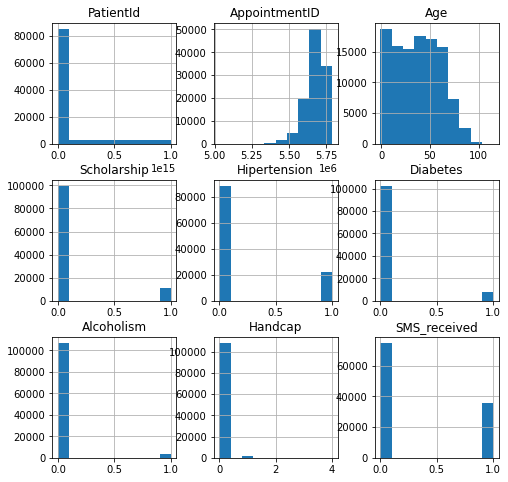

In [61]:
df.hist(figsize=(8,8));

### Dropping unreasonable data 

#### Drop rows with negative age values

In [62]:
df.drop(df[df.Age<0].index,inplace=True)

In [63]:
#check
sum(df[df.Age<0].index)

0

#### Drop rows with values greater than 1 for Handcap column

In [64]:
df.drop(df[df.Handcap>1].index,inplace=True)

In [65]:
#check
sum(df[df.Handcap>1].index)

0

#### Drop extraneous columns

In [66]:
df.drop(['PatientId','AppointmentID'],axis=1,inplace=True)

In [67]:
#check
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [68]:
df.shape

(110327, 12)

### Replacing values and Renaming labels

#### Rename the column's label ("No-show") with ("No_show") and ("ScheduledDay") with ("RegisterationDay")

In [69]:
df.rename(columns={'No-show':'No_show','ScheduledDay':'RegistrationDay'},inplace=True)

#### Replace "Yes" and "No" with boolean values

In [70]:
df.No_show=df.No_show.replace({'No':0,'Yes':1})

In [71]:
#check
df.No_show.unique()

array([0, 1], dtype=int64)

### Dealing with the datetime data

In [72]:
df.RegistrationDay = pd.to_datetime(df.RegistrationDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)
#reseting index
df.reset_index(drop=True, inplace=True)

In [73]:
#We add a column with the scheduled DayOfWeek that carries numeric values from 0 to 6; 0 is for Sunday
DayOfWeek=[]
for x in range (0,len(df.RegistrationDay)):
    y =df.RegistrationDay[x].strftime("%w")
    DayOfWeek.append(y)
df['Registration_DayOfWeek']=DayOfWeek


For Brazil the weekend days are Saturday 6 and Sunday 0

In [74]:
df.head()

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Registration_DayOfWeek
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,5
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5


In [75]:
df[df.Registration_DayOfWeek==0]

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Registration_DayOfWeek


In [76]:
df[df.Registration_DayOfWeek==6]

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Registration_DayOfWeek


There is no appointment in weekends

In [77]:
df['WaitingPeriod']= df.AppointmentDay - df.RegistrationDay 

In [78]:
df['WaitingPeriod']=pd.to_timedelta(df.WaitingPeriod, errors='coerce').dt.days

In [79]:
df

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Registration_DayOfWeek,WaitingPeriod
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,5,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110322,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,0,2,34
110323,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,0,2,34
110324,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,0,3,40
110325,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,0,3,40


There is negative waiting period which is not realistic

In [80]:
dropped_periods=df[df.WaitingPeriod < 0]
dropped_periods

,Gender,RegistrationDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Registration_DayOfWeek,WaitingPeriod
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,5,-1
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,5,-1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,5,-1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,5,-1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,5,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110311,F,2016-06-08 08:50:20+00:00,2016-06-08 00:00:00+00:00,14,MARIA ORTIZ,0,0,0,0,0,0,0,3,-1
110312,F,2016-06-08 08:20:01+00:00,2016-06-08 00:00:00+00:00,41,MARIA ORTIZ,0,0,0,0,0,0,0,3,-1
110313,M,2016-06-08 07:52:55+00:00,2016-06-08 00:00:00+00:00,2,ANTÔNIO HONÓRIO,0,0,0,0,0,0,0,3,-1
110314,F,2016-06-08 08:35:31+00:00,2016-06-08 00:00:00+00:00,58,MARIA ORTIZ,0,0,0,0,0,0,0,3,-1


### Drop the rows with negative waiting periods

In [81]:
df.drop(dropped_periods.index,axis=0,inplace=True)

In [82]:
#check
sum(df[df.WaitingPeriod < 0].index)

0

<a id='eda'></a>
## Exploratory Data Analysis


### What factors affect the patients'showing up?

In [ ]:
df.describe()

Average period between the registration and the appointment is about 15 days


#### Notes for EDA:

    1- 49.3% of the patients recieved a reminder message
  
    2- Most patients are between 19 and 57 years old
    
    3- Average period between the registration and the appointment is about 15 days
    
    4- Most patients wait for 3 to 8 days
    
    
    
    
    
 
    
    
    


#### Does SMS_received correlate with the No-show?

In [ ]:
#Masking data for patients that show up for their appointments and patients don't
Show_up = df[df.No_show==0]
No_show = df[df.No_show==1]
Show_up.SMS_received.mean()

In [ ]:
No_show.SMS_received.mean()

It seems that there is not a strong correlation

In [ ]:
# No_show.SMS_received.plot(kind='bar',alpha=0.5,bins=3,label='No show');
df.groupby('SMS_received').No_show.mean().plot(kind='bar');
plt.ylabel('Count Percentage')
plt.title("The relation between the reminder messeges and patients'no shows")
# plt.legend();

In [ ]:
df.plot.pie(y='Scholaship', figsize=(5, 5))

In [ ]:
df.plot.scatter(x='Age',y='No_show',c='DarkBlue');

In [ ]:
df.plot.pie(y='No_show', figsize=(5, 5));

#### Does Age correlate with the No-show?

In [ ]:
Show_up.Age.mean()

In [ ]:
No_show.Age.mean()

In [ ]:
Show_up.Age.hist(alpha=0.5,bins=20,label='Show Up');
No_show.Age.hist(alpha=0.5,bins=20,label='No Show');
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend();

Poor relation!

#### Does Scholarship correlate with the No-show?

In [ ]:
Show_up.Scholarship.mean()

In [ ]:
No_show.Scholarship.mean()

In [ ]:
df.groupby('Scholarship').No_show.mean().plot(kind='bar');


It seems that people with scholarships are more likely to not show up for their appointments

#### Does waiting period correlate with the No-show?

In [ ]:
Show_up.WaitingPeriod.mean()

In [ ]:
No_show.WaitingPeriod.mean()

In [ ]:
Show_up.WaitingPeriod.hist(alpha=0.5,bins=20,label='Show Up');
No_show.WaitingPeriod.hist(alpha=0.5,bins=20,label='No Show');
plt.legend();

People with short waiting periods (few are more likelt to show up

#### People with short waiting periods (few days) are more likelt to show up

In [ ]:
df.groupby('Diabetes').No_show.mean().plot(kind='bar');


In [ ]:
df.groupby('Alcoholism').No_show.mean().plot(kind='bar');


<a id='conclusions'></a>
## Conclusions


- The waiting period is an effective factor on the show-up , that people who waits for more than one week more likely to miss their appointment
- Patients who has scholarships are more likely to miss their appointment
- The age has a poor effect , however, young people are majority for the no shows